In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_movies= pd.read_csv("../data/ml-latest/movies.csv", usecols= ["movieId", "title"], dtype= {"movieId": "int32", "title": "str"})
df_ratings= pd.read_csv("../data/ml-latest/ratings.csv", usecols= ["userId", "movieId", "rating"], dtype= {"userId": "int32", "movieId": "int32", "rating": "float32"})

In [3]:
df_movies.describe()

,movieId
count,86537.000000
mean,155932.817096
std,78037.145347
min,1.000000
25%,111443.000000
50%,164574.000000
75%,211225.000000
max,288983.000000


In [4]:
df_ratings.describe()

,userId,movieId,rating
count,3.383216e+07,3.383216e+07,3.383216e+07
mean,1.654380e+05,2.831348e+04,3.542545e+00
std,9.534122e+04,4.992865e+04,1.063959e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,8.295300e+04,1.219000e+03,3.000000e+00
50%,1.661290e+05,3.263000e+03,4.000000e+00
75%,2.474500e+05,4.049100e+04,4.000000e+00
max,3.309750e+05,2.889830e+05,5.000000e+00


In [5]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 387.2 MB


In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int32 
 1   title    86537 non-null  object
dtypes: int32(1), object(1)
memory usage: 1014.2+ KB


In [7]:
print(df_ratings['userId'].max(), df_ratings['movieId'].max())


330975 288983


In [8]:
df_movies.head(10)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


In [9]:
df_ratings.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
5,1,381,3.5
6,1,596,4.0
7,1,1036,5.0
8,1,1049,3.0
9,1,1066,4.0


## 1.1B)

In [10]:
number_ratings_top10= pd.DataFrame(df_ratings.groupby("movieId")["rating"].count().sort_values(ascending=False).head(10)).rename(columns= {"rating": "rating_count"})
number_ratings_top10

,rating_count
movieId,
318,122296
356,113581
296,108756
2571,107056
593,101802
260,97202
2959,86207
527,84232
480,83026


In [11]:
title_number_ratings_top10= df_movies.merge(number_ratings_top10, on= "movieId").sort_values(by="rating_count")

In [12]:
title_number_ratings_top10

,movieId,title,rating_count
7,1196,Star Wars: Episode V - The Empire Strikes Back...,80200
4,480,Jurassic Park (1993),83026
5,527,Schindler's List (1993),84232
9,2959,Fight Club (1999),86207
0,260,Star Wars: Episode IV - A New Hope (1977),97202
6,593,"Silence of the Lambs, The (1991)",101802
8,2571,"Matrix, The (1999)",107056
1,296,Pulp Fiction (1994),108756
3,356,Forrest Gump (1994),113581
2,318,"Shawshank Redemption, The (1994)",122296


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
  Text(1, 0, 'Jurassic Park (1993)'),
  Text(2, 0, "Schindler's List (1993)"),
  Text(3, 0, 'Fight Club (1999)'),
  Text(4, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(5, 0, 'Silence of the Lambs, The (1991)'),
  Text(6, 0, 'Matrix, The (1999)'),
  Text(7, 0, 'Pulp Fiction (1994)'),
  Text(8, 0, 'Forrest Gump (1994)'),
  Text(9, 0, 'Shawshank Redemption, The (1994)')])

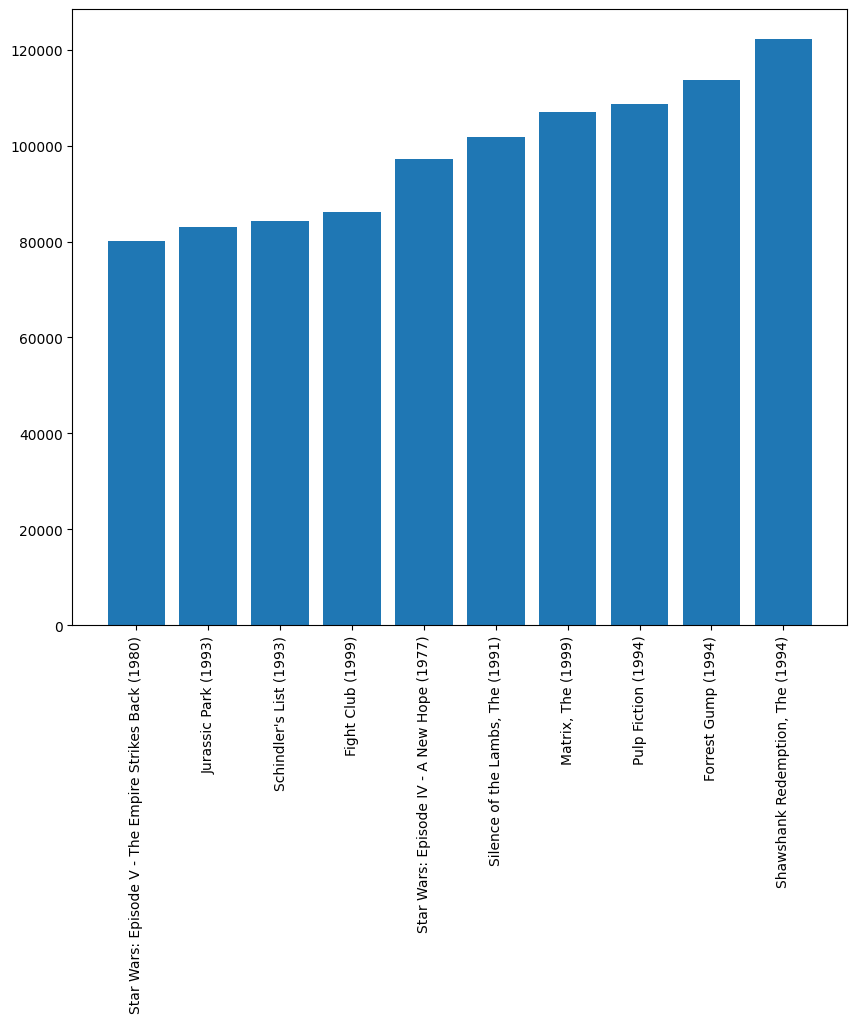

In [13]:
plt.figure(figsize= (10, 8))

plt.bar(title_number_ratings_top10["title"], title_number_ratings_top10["rating_count"])

plt.xticks(rotation= 90)

## 1.1C)

In [14]:
movieids= title_number_ratings_top10["movieId"]
movieids

7    1196
4     480
5     527
9    2959
0     260
6     593
8    2571
1     296
3     356
2     318
Name: movieId, dtype: int32

In [15]:
top10_movie_ratings= df_ratings[df_ratings["movieId"].isin(movieids)]
top10_movie_ratings

,userId,movieId,rating
3,1,260,4.5
4,1,356,5.0
10,1,1196,3.5
26,1,2571,2.5
113,2,296,5.0
...,...,...,...
33831871,330975,480,2.5
33831877,330975,527,3.5
33831890,330975,593,3.0
33831937,330975,1196,2.5


In [16]:
top10_mean_ratings= top10_movie_ratings.groupby("movieId")["rating"].mean()
top10_mean_ratings

movieId
260     4.092401
296     4.191778
318     4.416792
356     4.068189
480     3.689013
527     4.242337
593     4.150287
1196    4.118030
2571    4.160631
2959    4.236019
Name: rating, dtype: float32

In [17]:
title_mean_ratings= df_movies.merge(top10_mean_ratings, on= "movieId").rename(columns= {"rating": "mean_rating"}).sort_values(by= "mean_rating", ascending= False).set_index("movieId")

In [18]:
title_mean_ratings

,title,mean_rating
movieId,,
318,"Shawshank Redemption, The (1994)",4.416792
527,Schindler's List (1993),4.242337
2959,Fight Club (1999),4.236019
296,Pulp Fiction (1994),4.191778
2571,"Matrix, The (1999)",4.160631
593,"Silence of the Lambs, The (1991)",4.150287
1196,Star Wars: Episode V - The Empire Strikes Back...,4.118030
260,Star Wars: Episode IV - A New Hope (1977),4.092401
356,Forrest Gump (1994),4.068189


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Shawshank Redemption, The (1994)'),
  Text(1, 0, "Schindler's List (1993)"),
  Text(2, 0, 'Fight Club (1999)'),
  Text(3, 0, 'Pulp Fiction (1994)'),
  Text(4, 0, 'Matrix, The (1999)'),
  Text(5, 0, 'Silence of the Lambs, The (1991)'),
  Text(6, 0, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
  Text(7, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(8, 0, 'Forrest Gump (1994)'),
  Text(9, 0, 'Jurassic Park (1993)')])

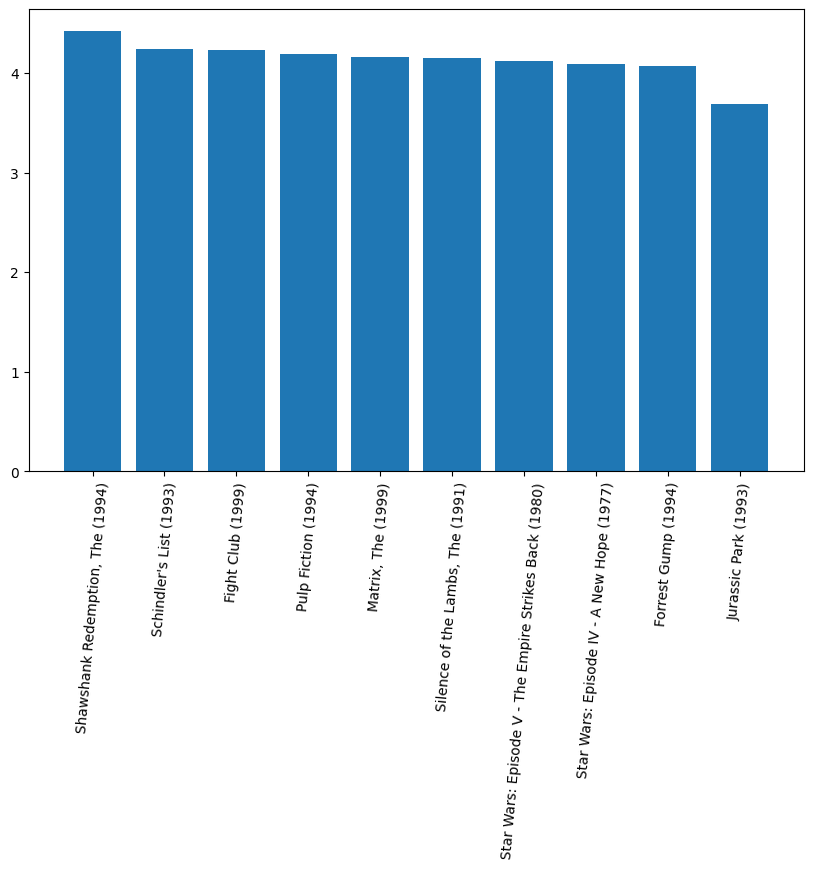

In [19]:
plt.figure(figsize= (10, 6))

plt.bar(title_mean_ratings["title"], title_mean_ratings["mean_rating"])
plt.xticks(rotation= 85)

## 1.1D)

In [20]:
movie_years= df_movies["title"].str.extract(r"\((\d{4})\)")

movie_years.columns= ["year"]
movie_years["title"]= df_movies["title"]


In [21]:
total_movie_year= movie_years.groupby("year")["year"].count().reset_index(name= "count").astype(int)
total_movie_year

,year,count
0,1874,1
1,1878,2
2,1880,1
3,1882,1
4,1883,1
...,...,...
137,2019,3058
138,2020,2628
139,2021,2297
140,2022,1962


([<matplotlib.axis.XTick at 0x1d7ef8417d0>,
 [Text(1870, 0, '1870'),
  Text(1870, 0, '1870'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1880, 0, '1880'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1890, 0, '1890'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1900, 0, '1900'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text(1910, 0, '1910'),
  Text

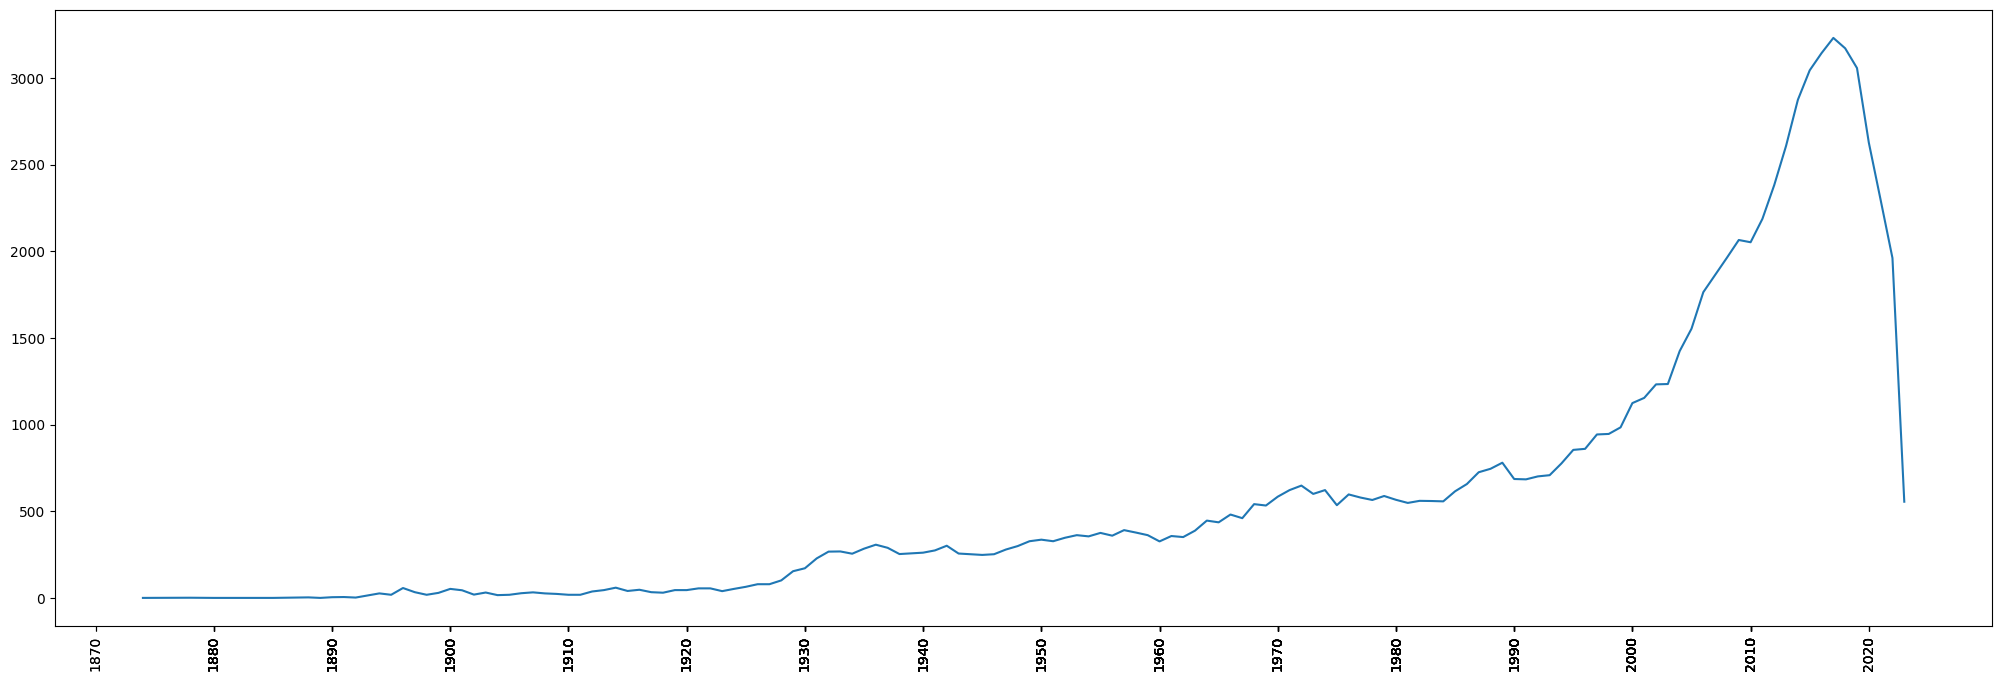

In [22]:
labels= (total_movie_year["year"]// 10)* 10

plt.figure(figsize= (25, 8))

plt.plot(total_movie_year["year"], total_movie_year["count"])

plt.xticks(rotation= 90, ticks= labels)

## 1.1E)

In [23]:
number_ratings_top10= pd.DataFrame(df_ratings.groupby("movieId")["rating"].sum().sort_values(ascending=False).head(10)).rename(columns= {"rating": "rating_count"})
number_ratings_top10


rating_per_id= df_ratings.groupby("movieId")["rating"].count().sort_values().reset_index(name= "count").tail(15)
rating_per_id

,movieId,count
83224,7153,75512
83225,110,75514
83226,1210,76773
83227,1,76813
83228,4993,79940
83229,1196,80200
83230,480,83026
83231,527,84232
83232,2959,86207
83233,260,97202


<BarContainer object of 15 artists>

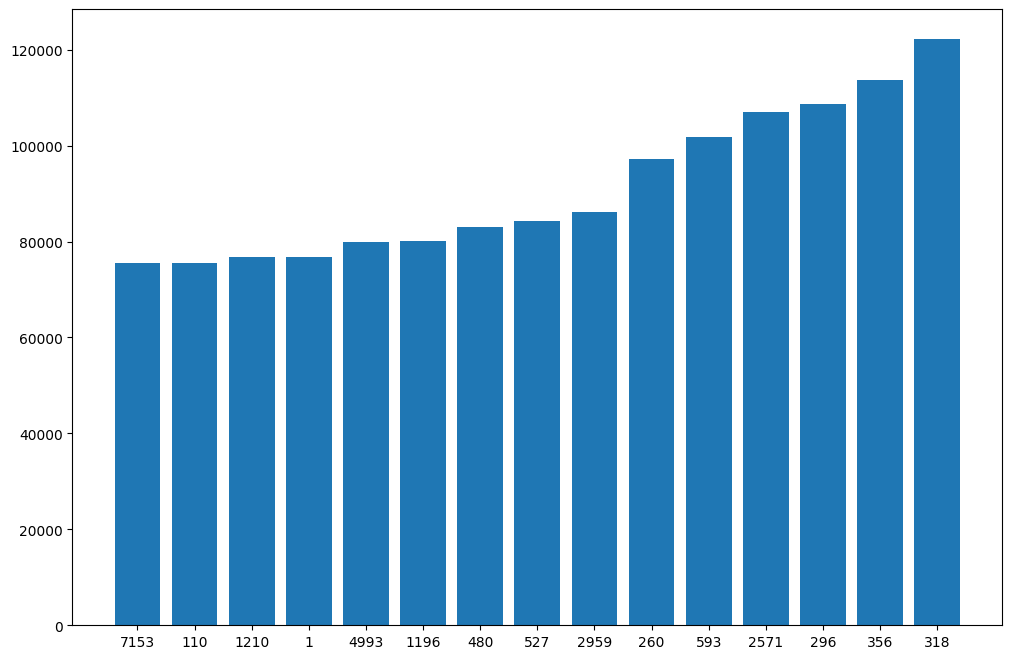

In [24]:
plt.figure(figsize= (12,8))

plt.bar(rating_per_id["movieId"].astype(str), rating_per_id["count"])

## 1.1F)

Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över
dessa.

In [25]:
df_movies

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
86532,288967,State of Siege: Temple Attack (2021)
86533,288971,Ouija Japan (2021)
86534,288975,The Men Who Made the Movies: Howard Hawks (1973)
86535,288977,Skinford: Death Sentence (2023)


In [26]:
df_ratings

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
...,...,...,...
33832157,330975,8340,2.0
33832158,330975,8493,2.5
33832159,330975,8622,4.0
33832160,330975,8665,3.0


In [27]:
top10_total_ratings= df_ratings.groupby("movieId")["rating"].count().sort_values().tail(10).reset_index(name= "count")
top10_total_ratings

,movieId,count
0,1196,80200
1,480,83026
2,527,84232
3,2959,86207
4,260,97202
5,593,101802
6,2571,107056
7,296,108756
8,356,113581
9,318,122296


In [28]:
title_count_ratings= top10_total_ratings.merge(df_movies, on= "movieId")
title_count_ratings

,movieId,count,title
0,1196,80200,Star Wars: Episode V - The Empire Strikes Back...
1,480,83026,Jurassic Park (1993)
2,527,84232,Schindler's List (1993)
3,2959,86207,Fight Club (1999)
4,260,97202,Star Wars: Episode IV - A New Hope (1977)
5,593,101802,"Silence of the Lambs, The (1991)"
6,2571,107056,"Matrix, The (1999)"
7,296,108756,Pulp Fiction (1994)
8,356,113581,Forrest Gump (1994)
9,318,122296,"Shawshank Redemption, The (1994)"


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Star Wars: Episode V - The Empire Strikes Back (1980)'),
  Text(1, 0, 'Jurassic Park (1993)'),
  Text(2, 0, "Schindler's List (1993)"),
  Text(3, 0, 'Fight Club (1999)'),
  Text(4, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(5, 0, 'Silence of the Lambs, The (1991)'),
  Text(6, 0, 'Matrix, The (1999)'),
  Text(7, 0, 'Pulp Fiction (1994)'),
  Text(8, 0, 'Forrest Gump (1994)'),
  Text(9, 0, 'Shawshank Redemption, The (1994)')])

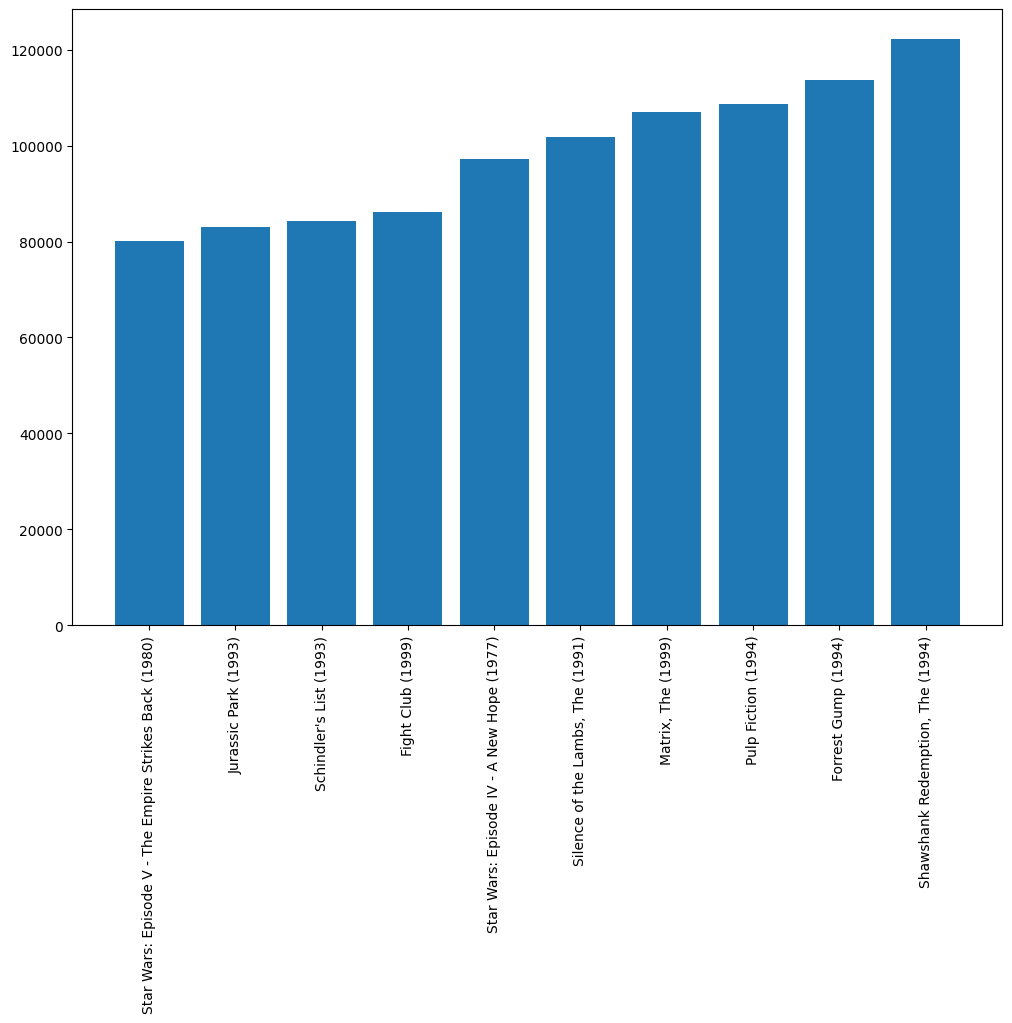

In [29]:
plt.figure(figsize= (12, 8))

plt.bar(title_count_ratings["title"], title_count_ratings["count"])
plt.xticks(rotation= 90)

## 1.2)

In [30]:
id_rating_count_check= df_ratings.groupby("movieId")["rating"].count().reset_index(name="count")
id_rating_count_check

,movieId,count
0,1,76813
1,2,30209
2,3,15820
3,4,3028
4,5,15801
...,...,...
83234,288967,1
83235,288971,1
83236,288975,1
83237,288977,1


In [31]:
id_rating_count_check= df_ratings.groupby("movieId")["rating"].count().reset_index(name="count")
id_rating_count_check= id_rating_count_check.loc[id_rating_count_check["count"]>2500]
over_25= id_rating_count_check["movieId"]
over_25

0             1
1             2
2             3
3             4
4             5
          ...  
73860    254726
75624    263007
77018    268642
77558    270698
78400    274053
Name: movieId, Length: 2546, dtype: int32

In [32]:
mask= df_ratings["movieId"].isin(over_25)
filtred_ratings= df_ratings.loc[mask]

good_movies= filtred_ratings[filtred_ratings["rating"]> 3]
mask= filtred_ratings["movieId"].isin(good_movies["movieId"])
filtred_ratings= filtred_ratings.loc[mask]
filtred_ratings


,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
...,...,...,...
33832155,330975,7153,4.0
33832157,330975,8340,2.0
33832159,330975,8622,4.0
33832160,330975,8665,3.0


In [33]:

movie_users= filtred_ratings.pivot(index= "movieId", columns= "userId", values= "rating").fillna(0)
movie_users

userId,1,2,3,4,5,6,7,8,9,10,...,330966,330967,330968,330969,330970,330971,330972,330973,330974,330975
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.5
2,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0
3,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
263007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from scipy.sparse import csr_matrix
from fuzzywuzzy import process


sparse_movie_users= csr_matrix(movie_users.values)
sparse_movie_users

c:\Users\milto\Documents\skola\Artificial_Intelligence2-Milton-OPA23\venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


<2546x329560 sparse matrix of type '<class 'numpy.float32'>'
	with 27273480 stored elements in Compressed Sparse Row format>

## 1.3)

In [35]:
from sklearn.neighbors import NearestNeighbors

model_knn= NearestNeighbors(n_neighbors= 5, algorithm= "brute", metric= "cosine")

# model_knn.fit(sparse_movie_users)

In [36]:
mask= df_movies["movieId"].isin(movie_users.index)
df_movies_filtered= df_movies.loc[mask]
df_movies_filtered

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
76901,254726,Dune (2021)
78753,263007,Spider-Man: No Way Home (2021)
80165,268642,The Batman (2022)
80759,270698,Everything Everywhere All at Once (2022)


In [37]:
def Recommendation(title, data, model, n_recommendations):
    model.fit(data)
    index_match= process.extractOne(title, df_movies_filtered["title"])[2]
    
    movieid= df_movies_filtered["movieId"][index_match]
    print(movieid)
    sparse_index = movie_users.index.get_loc(movieid)
    print(sparse_index)
    distances, indices= model.kneighbors(data[sparse_index], n_neighbors= n_recommendations)
    print("Selected movie: ", df_movies_filtered["title"][index_match])
    
    print("Movies you might like: ")
    for i in indices.flatten():
        movieid= movie_users.index[i]
        recommendation= df_movies_filtered[df_movies_filtered["movieId"]== movieid]["title"].iloc[0]
        print(i, recommendation)
    
Recommendation("starwars", sparse_movie_users, model_knn, 5)

260
141
Selected movie:  Star Wars: Episode IV - A New Hope (1977)
Movies you might like: 
141 Star Wars: Episode IV - A New Hope (1977)
496 Star Wars: Episode V - The Empire Strikes Back (1980)
508 Star Wars: Episode VI - Return of the Jedi (1983)
498 Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
1020 Matrix, The (1999)


In [38]:
df_movies_filtered.loc[257]

movieId                                          260
title      Star Wars: Episode IV - A New Hope (1977)
Name: 257, dtype: object

In [39]:
Recommendation("goodfellas", sparse_movie_users, model_knn, 5)

1213
511
Selected movie:  Goodfellas (1990)
Movies you might like: 
511 Goodfellas (1990)
518 Godfather: Part II, The (1974)
458 Reservoir Dogs (1992)
367 Godfather, The (1972)
159 Pulp Fiction (1994)


In [40]:
Recommendation("starwars", sparse_movie_users, model_knn, 5)

260
141
Selected movie:  Star Wars: Episode IV - A New Hope (1977)
Movies you might like: 
141 Star Wars: Episode IV - A New Hope (1977)
496 Star Wars: Episode V - The Empire Strikes Back (1980)
508 Star Wars: Episode VI - Return of the Jedi (1983)
498 Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
1020 Matrix, The (1999)


In [41]:
Recommendation("batman", sparse_movie_users, model_knn, 5)

153
83
Selected movie:  Batman Forever (1995)
Movies you might like: 
83 Batman Forever (1995)
296 Batman (1989)
206 True Lies (1994)
182 Ace Ventura: Pet Detective (1994)
93 Die Hard: With a Vengeance (1995)


## 2)


In [42]:
df_heart= pd.read_csv("../data/Heart.csv")

In [43]:
df_heart

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


## 2.A)

<Axes: xlabel='AHD', ylabel='count'>

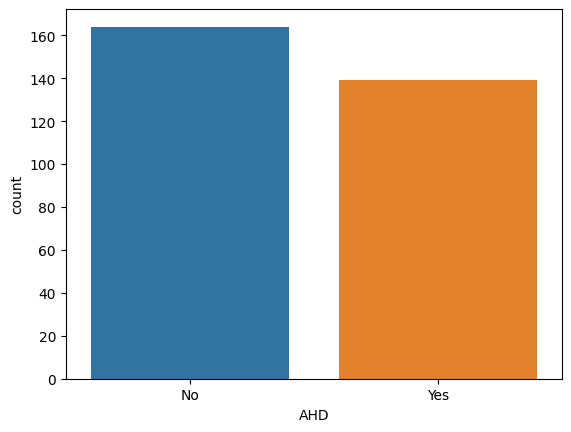

In [44]:
sns.countplot(df_heart, x= "AHD", hue="AHD")

## 2.B)

In [45]:
df_heart

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [46]:
categories=[
    (df_heart["Chol"]< 200),
    (df_heart["Chol"]>= 200) & (df_heart["Chol"]<= 240),
    (df_heart["Chol"]> 240),
]
categories=["Low", "Normal", "High"]

In [47]:
df_heart['Category'] = pd.cut(df_heart['Chol'], bins=[0, 199, 239, float('inf')], labels=categories, right=False)
df_heart
category_counts = df_heart['Category'].value_counts()

([<matplotlib.patches.Wedge at 0x1d7ef0d05d0>,
 [Text(-1.0957309232435946, -0.09681809669550352, 'High'),
  Text(1.017896515956296, -0.41699722157831504, 'Normal'),
  Text(0.504970503543539, 0.9772434653406411, 'Low')],
 [Text(-0.5976714126783242, -0.0528098709248201, '52.8%'),
  Text(0.5552162814307068, -0.22745302995180816, '32.0%'),
  Text(0.27543845647829396, 0.5330418901858042, '15.2%')])

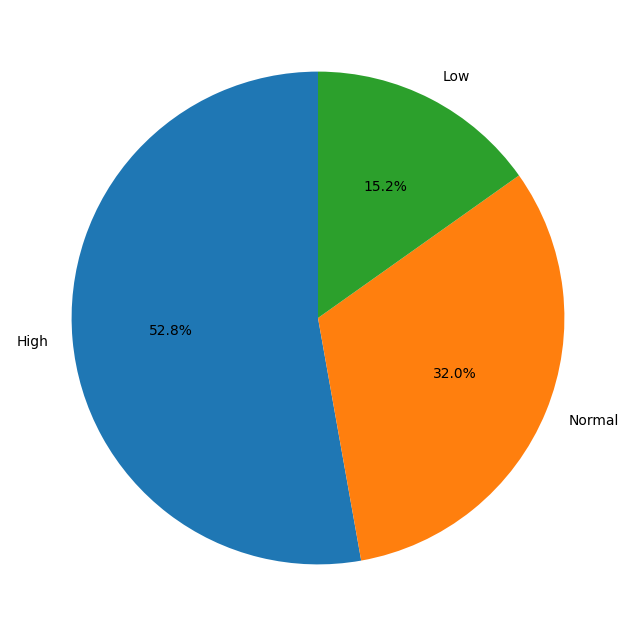

In [48]:
plt.figure(figsize= (10, 8))

plt.pie(category_counts, labels= category_counts.index, autopct='%1.1f%%', startangle= 90)

## 2.C)


<Axes: xlabel='Age', ylabel='Count'>

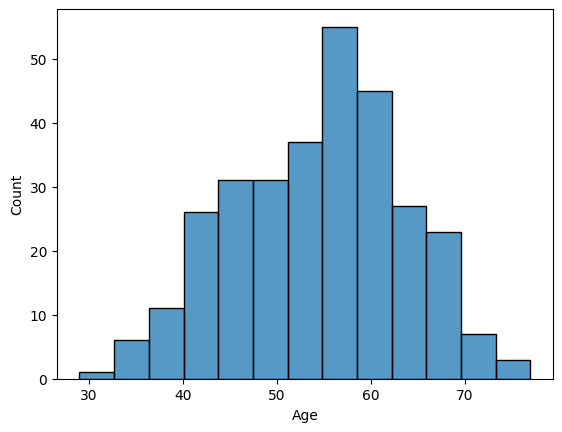

In [49]:
sns.histplot(data= df_heart, x= "Age")

## 2.D)

In [50]:
df_cardio= pd.read_csv("../data/cardio_train.csv", sep= ";")
df_cardio["age"]= (df_cardio["age"] / 365).round().astype(int)
df_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


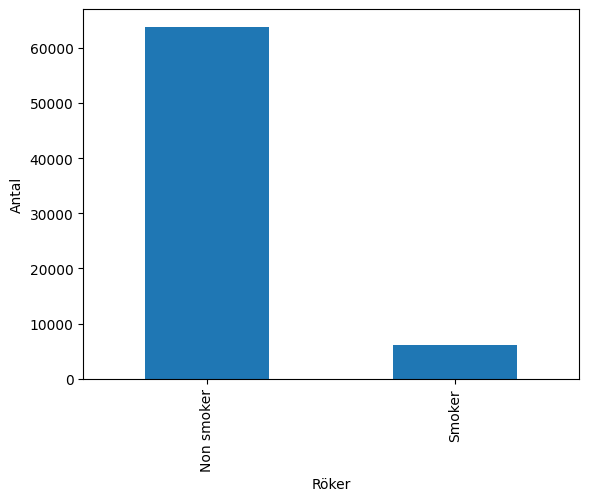

In [51]:
smoker= df_cardio["smoke"].value_counts()

smoker.plot(kind= "bar")
plt.xlabel('Röker')
plt.ylabel('Antal')
plt.xticks(range(len(smoker)), ['Non smoker', 'Smoker'])
plt.show()

## 2.E)

<Axes: xlabel='weight', ylabel='Count'>

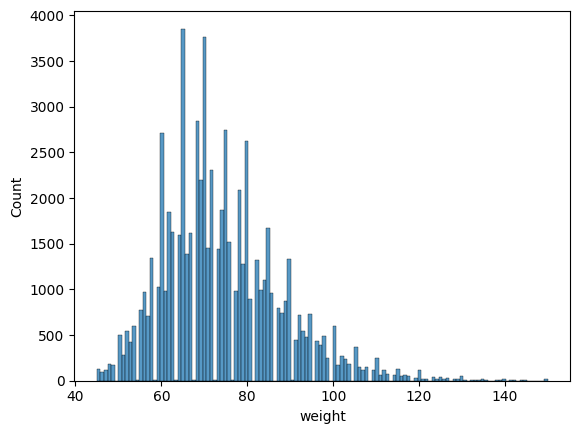

In [52]:
weight_filtered= df_cardio[(df_cardio["weight"] >= 45) & (df_cardio["weight"] <= 150)]

sns.histplot(data= weight_filtered, x="weight")

## 2.F)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


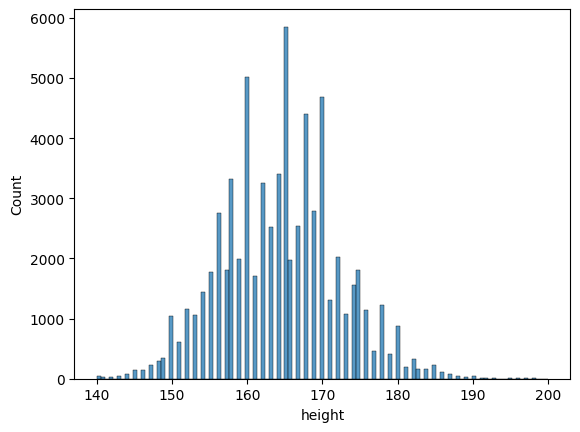

In [53]:
height_filtered= df_cardio[(df_cardio["height"] >= 140) & (df_cardio["height"] <= 200)]

sns.histplot(data= height_filtered, x= "height")
height_filtered

## 2.G)

<Axes: xlabel='AHD', ylabel='count'>

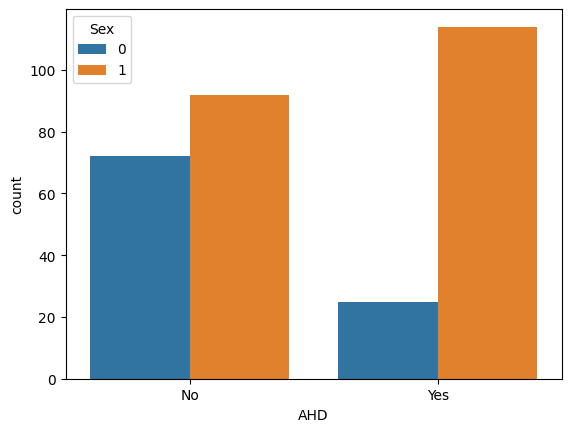

In [54]:
sns.countplot(data= df_heart, x= "AHD", hue= "Sex")

## 2.1)

In [55]:
df_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [56]:
df_cardio["BMI"]= df_cardio["weight"] / (df_cardio["height"] / 100)**2

In [57]:
df_cardio.sort_values(by= "BMI", ascending= False)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
12770,18218,54,1,75,168.0,120,80,1,1,1,0,1,1,298.666667
27384,39156,42,1,80,178.0,140,90,3,3,0,0,1,1,278.125000
22723,32456,64,1,55,81.0,130,90,1,1,0,0,1,1,267.768595
23913,34186,52,1,81,156.0,140,90,1,1,0,0,1,0,237.768633
29157,41661,52,1,60,69.0,110,70,1,1,0,0,0,0,191.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26806,38312,64,1,157,23.0,110,80,1,1,0,0,1,0,9.331007
60188,85931,60,1,162,21.0,120,80,2,1,0,0,1,1,8.001829
29488,42156,56,2,177,22.0,120,80,1,1,1,1,1,0,7.022248
57858,82567,52,2,165,10.0,180,1100,2,2,0,0,1,1,3.673095


### Jag tar från vad jag kan hitta 12 och 43, under och över är orimligt. Kan hända men extremt sällsynt. Tyckte att de var extrema värden så ger och tar lite

In [58]:
mask= (df_cardio["BMI"] > 17.5) & (df_cardio["BMI"] < 43)
df_cardio= df_cardio.loc[mask]

In [59]:
df_cardio.sort_values(by= "BMI", ascending= False)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
18943,27048,46,1,165,117.0,120,80,1,1,0,0,1,0,42.975207
65067,92870,44,1,160,110.0,110,70,1,1,0,0,1,0,42.968750
10856,15528,56,1,160,110.0,130,80,1,1,0,0,0,1,42.968750
59379,84784,56,1,160,110.0,170,100,1,2,0,0,0,1,42.968750
66580,95055,42,1,160,110.0,160,100,1,1,0,0,1,1,42.968750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24604,35123,64,2,182,58.0,120,80,1,1,0,0,0,0,17.509963
55141,78658,56,2,182,58.0,120,80,1,1,1,1,0,0,17.509963
25001,35710,60,1,169,50.0,130,80,1,1,0,0,1,1,17.506390
59869,85482,52,1,169,50.0,90,60,1,1,0,0,1,1,17.506390


normal range, overweight, obese (class I), obese
(class II), obese (class III)

In [60]:
conditions=[
    (df_cardio["BMI"] < 18.5),
    (df_cardio["BMI"] >= 18.5) & (df_cardio["BMI"] < 25),
    (df_cardio["BMI"] >= 25) & (df_cardio["BMI"] < 30),
    (df_cardio["BMI"] >= 30) & (df_cardio["BMI"] < 35),
    (df_cardio["BMI"] >= 35) & (df_cardio["BMI"] < 40),
    (df_cardio["BMI"] >= 40)
]
categories=["Under", "Normal", "Over", "Obesity_1", "Obesity_2", "Obesity_3"]

df_cardio["BMI_class"]= np.select(conditions, categories)

C:\Users\milto\AppData\Local\Temp\ipykernel_13048\324130525.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cardio["BMI_class"]= np.select(conditions, categories)


<Axes: xlabel='BMI', ylabel='Count'>

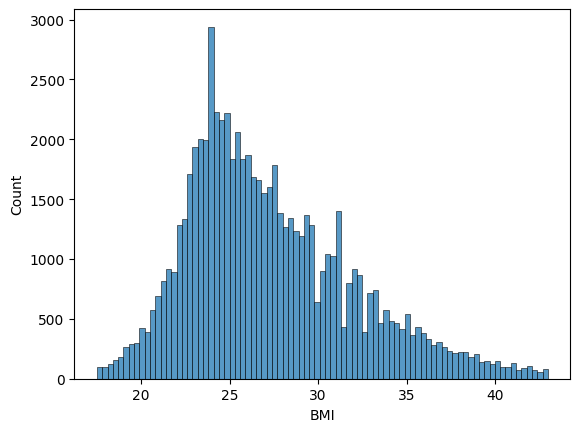

In [61]:
sns.histplot(data= df_cardio, x= "BMI")

## 2.1.1)

In [62]:
df_heart

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Category
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,Normal
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,High
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,Normal
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,High
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes,High
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes,Low
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes,Low
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes,Normal


### Kategorier från länk i uppgiften

In [63]:
df_heart.sort_values(by= "RestBP")

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Category
222,223,39,0,nonanginal,94,199,0,0,179,0,0.0,1,0.0,normal,No,Normal
131,132,51,1,nonanginal,94,227,0,0,154,1,0.0,1,1.0,reversable,No,Normal
122,123,51,1,nonanginal,100,222,0,0,143,1,1.2,2,0.0,normal,No,Normal
246,247,58,1,asymptomatic,100,234,0,0,156,0,0.1,1,1.0,reversable,Yes,Normal
163,164,58,0,asymptomatic,100,248,0,2,122,0,1.0,2,0.0,normal,No,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,84,68,1,nonanginal,180,274,1,2,150,1,1.6,2,0.0,reversable,Yes,High
201,202,64,0,asymptomatic,180,325,0,0,154,1,0.0,1,0.0,normal,No,High
231,232,55,0,asymptomatic,180,327,0,1,117,1,3.4,2,0.0,normal,Yes,High
188,189,54,1,nontypical,192,283,0,2,195,0,0.0,1,1.0,reversable,Yes,High


In [64]:
conditions=[
    (df_heart["RestBP"] < 120),
    (df_heart["RestBP"] >= 120) & (df_heart["RestBP"] < 130),
    (df_heart["RestBP"] >= 130) & (df_heart["RestBP"] < 140),
    (df_heart["RestBP"] >= 140) & (df_heart["RestBP"] < 180),
    (df_heart["RestBP"] >= 180)
]
categories=["Healty", "Elivated", "Stage_1_hypertension", "Stage_2_hypertension", "Hypertension_crisis"]

df_heart["BP_class"]= np.select(conditions, categories)

<Axes: xlabel='RestBP', ylabel='Count'>

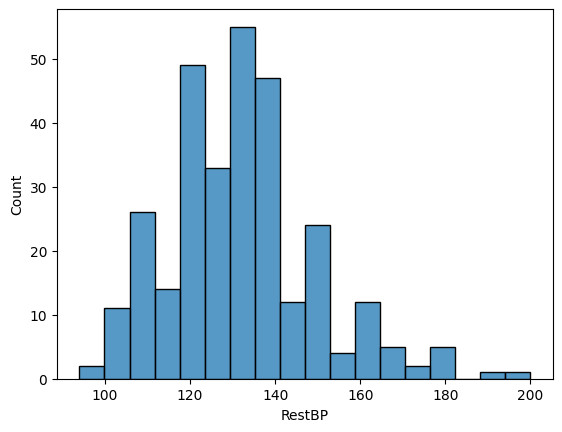

In [65]:
sns.histplot(data= df_heart, x= "RestBP")

In [66]:
df_heart

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Category,BP_class
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,Normal,Stage_2_hypertension
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,High,Stage_2_hypertension
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,Normal,Elivated
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,High,Stage_1_hypertension
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,Normal,Stage_1_hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes,High,Healty
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes,Low,Stage_2_hypertension
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes,Low,Stage_1_hypertension
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes,Normal,Stage_1_hypertension


## 2.2)


In [67]:
bp_ahd= df_heart.groupby("BP_class")["AHD"].value_counts().reset_index(name= "count")
bp_ahd

,BP_class,AHD,count
0,Elivated,No,40
1,Elivated,Yes,35
2,Healty,No,37
3,Healty,Yes,23
4,Hypertension_crisis,Yes,4
5,Hypertension_crisis,No,1
6,Stage_1_hypertension,No,43
7,Stage_1_hypertension,Yes,27
8,Stage_2_hypertension,Yes,50
9,Stage_2_hypertension,No,43


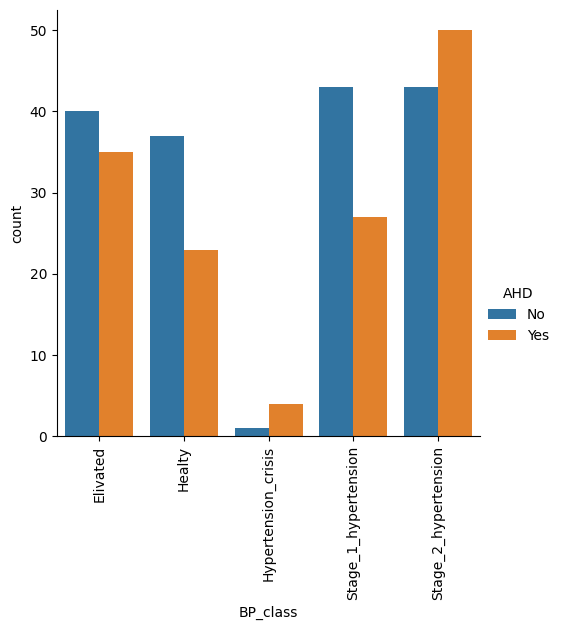

In [68]:
g = sns.catplot(
    data=bp_ahd,
    x="BP_class",
    y="count",
    kind="bar",
    hue="AHD",
)
plt.xticks(rotation= 90)
plt.show()

In [69]:
df_heart

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,Category,BP_class
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,Normal,Stage_2_hypertension
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,High,Stage_2_hypertension
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,Normal,Elivated
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,High,Stage_1_hypertension
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,Normal,Stage_1_hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes,High,Healty
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes,Low,Stage_2_hypertension
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes,Low,Stage_1_hypertension
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes,Normal,Stage_1_hypertension


In [70]:
df_cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_class
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obesity_1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Over
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,58,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,Over
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,Over
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,Obesity_1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,Over
